<a href="http://www.louisville.edu"><img src = "https://scontent-ort2-2.xx.fbcdn.net/v/t1.6435-9/185393772_10157730198765899_6137133964003342304_n.jpg?_nc_cat=102&ccb=1-5&_nc_sid=6e5ad9&_nc_ohc=nhwGx_CPtF0AX-k_sR4&_nc_ht=scontent-ort2-2.xx&oh=00_AT9-NHyX-MdiUHq34g-aG-Cj16o8N4e1oJyIRb0ZiKdD2Q&oe=61F8FC7B" width = 400> </a>

<h1 align=center><font size = 5>CSE 551 Data Visualization</font></h1>
<h1 align=center><font size = 5> HW1 - Data visualization basic skills - area plots, histograms, and bar plots</font></h1>
<h1 align=center><font size = 5> Due time - Jan 29th </font></h1>


# Exploring Datasets with *pandas* and Matplotlib<a id="0"></a>

In this homework, we will use Matplotlib library, together with Numpy and/or Pandas to create plots.

Toolkits: As we introcued in our lectures, please use [*pandas*](http://pandas.pydata.org/) and [**Numpy**](http://www.numpy.org/) for data wrangling, analysis, and visualization. The primary plotting library that we are exploring in the course is [Matplotlib](http://matplotlib.org/).

Dataset: Immigration to USA from 1980 to 2013. 

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Accessing Data](#2)<br>
2. [Visualizing Data using Matplotlib](#4) <br>
3. [Area Plots](#6) <br>
4. [Bar Plots](#8) <br>
5. [Pie Charts](#10) <br>
</div>
<hr>

# Accessing Data <a id="2"></a>

Import Primary Modules. The first thing we'll do is import two key data analysis modules: *pandas* and **Numpy**.

In [2]:
# install the numpy module
# -y confirms the installation prompts; NOTE for me!
!conda install numpy -y
!conda install pandas -y
print('success!')

Retrieving notices: ...working... done



==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 25.1.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=25.1.0





Solving environment: ...working... done

# All requested packages already installed.


Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 25.1.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=25.1.0




In [3]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Access the dataset and read it into a *pandas* dataframe.

In [4]:
df_usa = pd.read_csv('USA.csv', encoding = "ISO-8859-1")

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Let's take a look at the first five items in our dataset.

In [5]:
df_usa.head(5)
print(df_usa['Country'].tolist())

['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'China, Hong Kong Special Administrative Region', 'China, Macao Special Administrative Region', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', "Democratic People's Republic of Korea", 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Erit

Let's find out how many entries there are in our dataset.

In [6]:
# print the dimensions of the dataframe
print(df_usa.shape)

(214, 43)


Clean up data. We will make some modifications to the original dataset to make it easier to create our visualizations. Refer to `Introduction to Matplotlib and Line Plots` lab for the rational and detailed description of the changes.

#### 1. Clean up the dataset to remove columns that are not informative to us for visualization (eg. Type, AREA, REG).

In [7]:
df_usa.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_usa.head(5)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Less developed regions,722,1881,1569,2566,3222,2794,...,2137,4749,3417,1753,2813,3165,2017,1648,1617,2196
1,Albania,Europe,Southern Europe,More developed regions,30,11,23,22,32,45,...,3840,5947,7914,5737,5754,5137,4711,3612,3364,3186
2,Algeria,Africa,Northern Africa,Less developed regions,175,184,190,201,197,202,...,805,1115,1300,1036,1037,1485,1305,1364,1369,1241
3,American Samoa,Oceania,Polynesia,Less developed regions,0,0,7,7,0,0,...,12,15,28,11,14,19,14,D,-,D
4,Andorra,Europe,Southern Europe,More developed regions,2,3,2,1,0,0,...,..,..,..,..,..,..,..,..,..,..


Notice how the columns Type, Coverage, AREA, REG, and DEV got removed from the dataframe.

#### 2. For consistency, ensure that all column labels of type string.

In [8]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in df_usa.columns)

True

Notice how the above line of code returned *False* when we tested if all the column labels are of type **string**. So let's change them all to **string** type.

In [9]:
df_usa.columns = list(map(str, df_usa.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in df_usa.columns)

True

#### 3. Set the country name as index - useful for quickly looking up countries using .loc method.

In [10]:
df_usa.set_index('Country', inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_usa.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Less developed regions,722,1881,1569,2566,3222,2794,2831,...,2137,4749,3417,1753,2813,3165,2017,1648,1617,2196
Albania,Europe,Southern Europe,More developed regions,30,11,23,22,32,45,53,...,3840,5947,7914,5737,5754,5137,4711,3612,3364,3186
Algeria,Africa,Northern Africa,Less developed regions,175,184,190,201,197,202,183,...,805,1115,1300,1036,1037,1485,1305,1364,1369,1241
American Samoa,Oceania,Polynesia,Less developed regions,0,0,7,7,0,0,0,...,12,15,28,11,14,19,14,D,-,D
Andorra,Europe,Southern Europe,More developed regions,2,3,2,1,0,0,1,...,..,..,..,..,..,..,..,..,..,..


Notice how the country names now serve as indices.

#### 4. Clean up the obove dataframe - to do: turn non-numeric cells in years 1980-2013 to 0 or NAN

In [11]:
# add your implementation here

df_usa = df_usa.apply(pd.to_numeric, errors='coerce')

In [12]:
df_usa.head(20)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,722.0,1881.0,1569.0,2566.0,3222.0,2794.0,2831.0,...,2137.0,4749.0,3417.0,1753.0,2813.0,3165.0,2017.0,1648.0,1617.0,2196.0
Albania,NaN,NaN,NaN,30.0,11.0,23.0,22.0,32.0,45.0,53.0,...,3840.0,5947.0,7914.0,5737.0,5754.0,5137.0,4711.0,3612.0,3364.0,3186.0
Algeria,NaN,NaN,NaN,175.0,184.0,190.0,201.0,197.0,202.0,183.0,...,805.0,1115.0,1300.0,1036.0,1037.0,1485.0,1305.0,1364.0,1369.0,1241.0
American Samoa,NaN,NaN,NaN,0.0,0.0,7.0,7.0,0.0,0.0,0.0,...,12.0,15.0,28.0,11.0,14.0,19.0,14.0,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,2.0,3.0,2.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,NaN,NaN,194.0,144.0,126.0,116.0,146.0,120.0,116.0,...,107.0,188.0,272.0,199.0,221.0,173.0,148.0,148.0,187.0,143.0
Anguilla,NaN,NaN,NaN,148.0,116.0,89.0,58.0,61.0,53.0,64.0,...,22.0,35.0,32.0,25.0,22.0,21.0,19.0,25.0,23.0,22.0
Antigua and Barbuda,NaN,NaN,NaN,972.0,929.0,3234.0,2008.0,953.0,957.0,812.0,...,414.0,440.0,570.0,415.0,444.0,437.0,359.0,368.0,337.0,344.0
Argentina,NaN,NaN,NaN,2815.0,2236.0,2065.0,2029.0,2141.0,1844.0,2187.0,...,4805.0,7081.0,7327.0,5645.0,5353.0,5780.0,4399.0,4473.0,4359.0,4372.0


#### 5. Add a "total" column at the end of the datatrame

In [13]:
# e.g., df_usa['Total'] = df_usa.sum(axis=1, skipna = True)
# add your implementation here

df_usa['Total'] = df_usa.sum(axis=1, skipna = True)


In [14]:
df_usa.head(20)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,722.0,1881.0,1569.0,2566.0,3222.0,2794.0,2831.0,...,4749.0,3417.0,1753.0,2813.0,3165.0,2017.0,1648.0,1617.0,2196.0,74430.0
Albania,NaN,NaN,NaN,30.0,11.0,23.0,22.0,32.0,45.0,53.0,...,5947.0,7914.0,5737.0,5754.0,5137.0,4711.0,3612.0,3364.0,3186.0,87380.0
Algeria,NaN,NaN,NaN,175.0,184.0,190.0,201.0,197.0,202.0,183.0,...,1115.0,1300.0,1036.0,1037.0,1485.0,1305.0,1364.0,1369.0,1241.0,23281.0
American Samoa,NaN,NaN,NaN,0.0,0.0,7.0,7.0,0.0,0.0,0.0,...,15.0,28.0,11.0,14.0,19.0,14.0,NaN,NaN,NaN,220.0
Andorra,NaN,NaN,NaN,2.0,3.0,2.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0
Angola,NaN,NaN,NaN,194.0,144.0,126.0,116.0,146.0,120.0,116.0,...,188.0,272.0,199.0,221.0,173.0,148.0,148.0,187.0,143.0,4430.0
Anguilla,NaN,NaN,NaN,148.0,116.0,89.0,58.0,61.0,53.0,64.0,...,35.0,32.0,25.0,22.0,21.0,19.0,25.0,23.0,22.0,1385.0
Antigua and Barbuda,NaN,NaN,NaN,972.0,929.0,3234.0,2008.0,953.0,957.0,812.0,...,440.0,570.0,415.0,444.0,437.0,359.0,368.0,337.0,344.0,24052.0
Argentina,NaN,NaN,NaN,2815.0,2236.0,2065.0,2029.0,2141.0,1844.0,2187.0,...,7081.0,7327.0,5645.0,5353.0,5780.0,4399.0,4473.0,4359.0,4372.0,116501.0


Now the dataframe has an extra column that presents the total number of immigrants from each country in the dataset from 1980 - 2013. So if we print the dimension of the data, we get:

In [15]:
# finally, let's create a list of years from 1980 - 2013
# this will come in handy when we start plotting the data
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

# Visualizing Data using Matplotlib<a id="4"></a>

Import `Matplotlib` and **Numpy**.

In [16]:
#install matplotlib
!conda install matplotlib -y

# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0



==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 25.1.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=25.1.0




Solving environment: ...working... done

# All requested packages already installed.

Matplotlib version:  3.8.0


# Area Plots of immigration from top 5 countries in 1980-2013<a id="6"></a>

Leveraging the new "total" column in your dataframe, please visualize the top 5 countries that contributed the most immigrants to USA from 1980 to 2013. Please use **Stacked Line Plot** or **Area plot** for this visualization.

Reference: [Area plot using pandas dataframe] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.area.html


In [17]:
# add your implementation here
# show columns Country and Total
# sort Total in Descending order
# as a note, there is a total value in Country; exclude this
# to exclude, specify Country values NOT equal to total
top_5_countries = df_usa[df_usa.index != 'Total'].sort_values(by='Total', ascending=False).head(5)['Total']
top_5_countries # show top 5

Country
Philippines           1798872.0
China                 1625912.0
India                 1533776.0
Viet Nam              1261426.0
Dominican Republic    1067939.0
Name: Total, dtype: float64

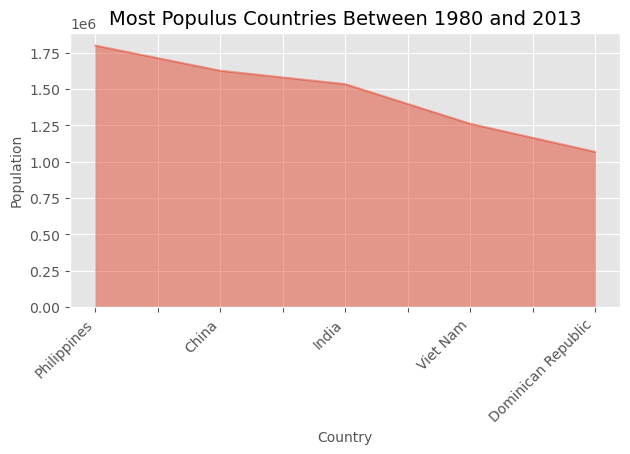

In [18]:
# Show basic Area plot
top_5_countries.plot.area(stacked=False)

# add labels and title
plt.title('Most Populus Countries Between 1980 and 2013', fontsize=14)
plt.xlabel('Country', fontsize=10)
plt.ylabel('Population', fontsize=10)

# angle x-axis to prevent overlap
plt.xticks(rotation=45, ha='right') # 45 degree angle

# tighten layout
plt.tight_layout()

plt.show()

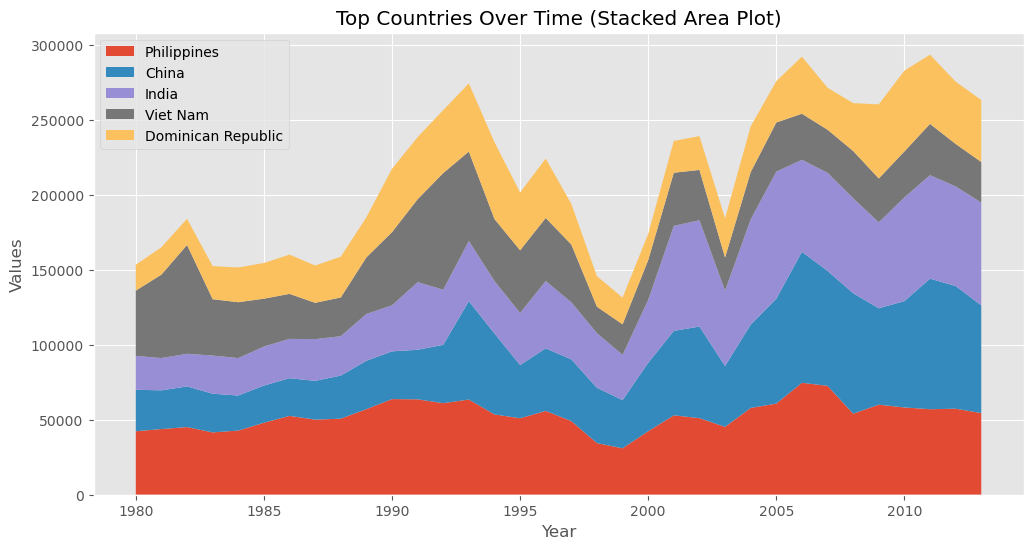

In [33]:
df_usa_sorted = df_usa[df_usa.index != 'Total'].sort_values(by='Total', ascending=False)


top_countries = df_usa_sorted.head(5)


top_countries = top_countries.drop(columns=['Continent', 'Region', 'DevName', 'Total'])

top_countries_transposed = top_countries.T


top_countries_transposed.index = top_countries_transposed.index.astype(int)


plt.figure(figsize=(12, 6))
plt.stackplot(
    top_countries_transposed.index,  # X-axis (years)
    top_countries_transposed.values.T,  # Y-axis (values for each country)
    labels=top_countries_transposed.columns  # Labels for each country
)
plt.title('Top Countries Over Time (Stacked Area Plot)')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Bar Charts of immigrations from all countries in 2013 <a id="10"></a>

A bar plot is a way of representing data where the *length* of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals. Please use bar charts to visualize how all the countries contributed immigrants to USA in 2013.

Reference: [Bar plot using pandas dataframe] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

In [20]:
# SHOW TOP COUNTRIES IN 2013 TO GET A FEEL FOR THE DATA
df_2013 = df_usa[df_usa.index != 'Total'].sort_values(by='2013',ascending=False)['2013']
df_2013

Country
China                           71798.0
India                           68458.0
Philippines                     54446.0
Dominican Republic              41311.0
Cuba                            32219.0
                                 ...   
Tuvalu                              NaN
United States Virgin Islands        NaN
Vanuatu                             NaN
Wallis and Futuna Islands           NaN
Western Sahara                      NaN
Name: 2013, Length: 213, dtype: float64

In [21]:
# get count of nan countries
NaN_count_2013 = df_usa['2013'].isna().sum()

# get list of countries with NaN values
Nan_count_2013_countries = df_usa[df_usa['2013'].isna()].index

# print NaN info
print(f'There are {NaN_count_2013} countries with NaN values in 2013. They are: \n{Nan_count_2013_countries}')

There are 26 countries with NaN values in 2013. They are: 
Index(['American Samoa', 'Andorra', 'Cook Islands',
       'Falkland Islands (Malvinas)', 'French Guiana', 'French Polynesia',
       'Gibraltar', 'Greenland', 'Guadeloupe', 'Liechtenstein', 'Maldives',
       'Martinique', 'Montserrat', 'Nauru', 'Niue', 'Northern Mariana Islands',
       'Puerto Rico', 'Réunion', 'Saint Helena', 'Saint Pierre and Miquelon',
       'San Marino', 'Tuvalu', 'United States Virgin Islands', 'Vanuatu',
       'Wallis and Futuna Islands', 'Western Sahara'],
      dtype='object', name='Country')


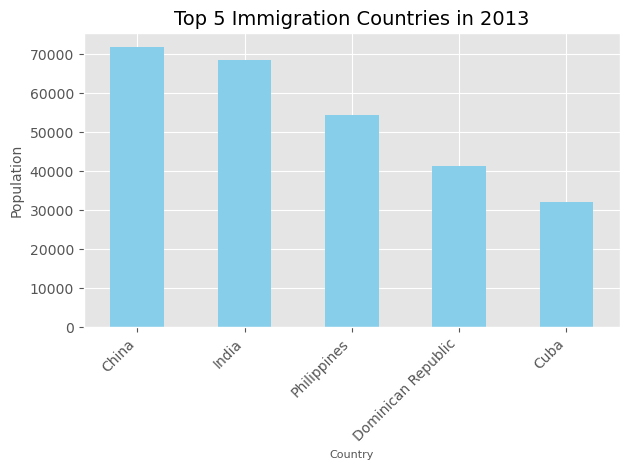

In [22]:
# plot top 5 for cleanliness and to get a better feel for the data
df_2013_top5 = df_2013.head()

# plot data using a bar chart
df_2013_top5.plot.bar(color='skyblue')

# add labels and title
plt.title('Top 5 Immigration Countries in 2013', fontsize=14)
plt.xlabel('Country', fontsize=8)
plt.ylabel('Population', fontsize=10)

# offset x-axis
plt.xticks(rotation=45, ha='right') # 45 degree angle

# tighten layout
plt.tight_layout()

plt.show()

In [23]:
import textwrap # for bar chart
print('successful')

successful


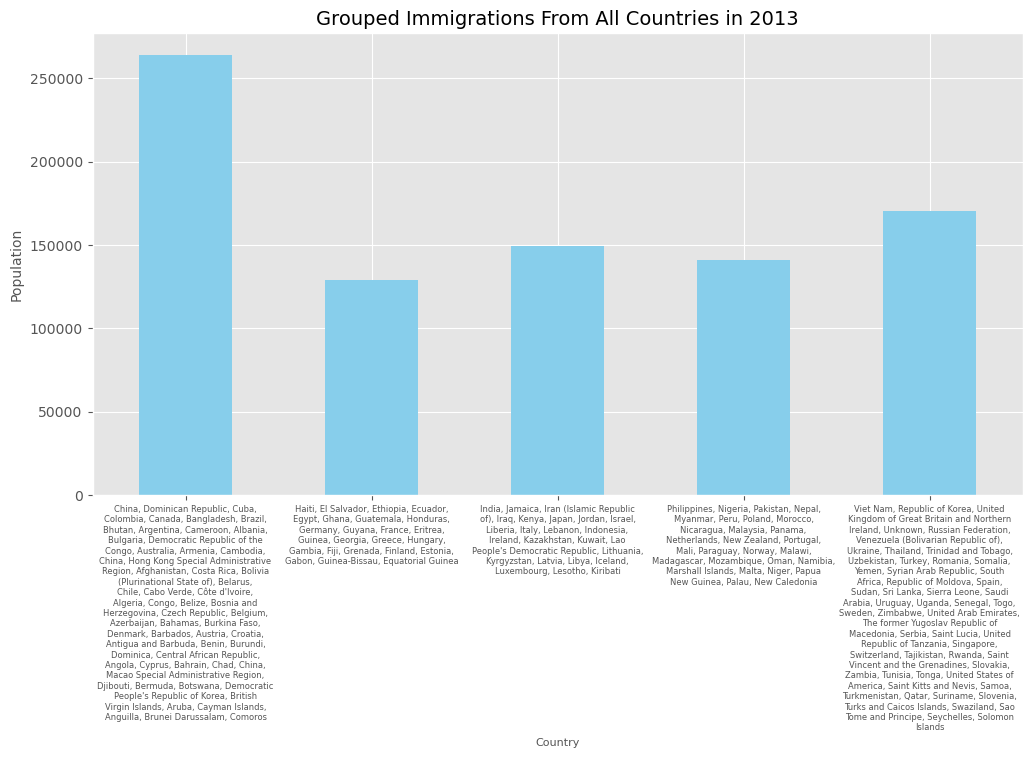

In [24]:
# plot everything excluding Nan values
# Grouping the data alphabetically to make it more readible 
df_2013_noNaN = df_2013.dropna()

# Create alphabetical bin for each country. Create 6 bins
alphabetical_bins = {
    'A-D': list('ABCD'),
    'E-H': list('EFGH'),
    'I-L': list('IJKL'),
    'M-P': list('MNOP'),
    'Q-Z': list('QRSTUVWXYZ')
}

# Create function to map each country to its alphabetical bin
def assign_alphabet_bin(country):
    for bin_name, letters in alphabetical_bins.items():
        if country[0].upper() in letters: # check the first letter of the county name
            return bin_name
    return 'Other' # in case no match is found; catch all

# apply the mapping function to assign each country a bin
alphabet_groups = df_2013_noNaN.index.to_series().map(assign_alphabet_bin)

# Aggregate data: sum pop and collect country names in each alphabetical bin
grouped_data = df_2013_noNaN.groupby(alphabet_groups).agg(TotalPopulation='sum', Countries=lambda x: ', '.join(x.index))

# helper function to wrap labels
def wrap_labels(label, width=30):
    """wrap labels to multiple lines for better readability"""
    return '\n'.join(textwrap.wrap(label, width))

# apply the wrapping to country labels
grouped_data['CountriesWrapped'] = grouped_data['Countries'].map(lambda x: wrap_labels(x, width=40))

# size char and plot
plt.figure(figsize=(12,6))
grouped_data['TotalPopulation'].plot.bar(color='skyblue') # bar plot!

# customize x-axis labels with list of countries in each bin
plt.xticks(ticks=range(len(grouped_data)), labels=grouped_data['CountriesWrapped'], rotation=0, fontsize=6, ha='center') 

# add labels and title
plt.title('Grouped Immigrations From All Countries in 2013', fontsize=14)
plt.xlabel('Country', fontsize=8)
plt.ylabel('Population', fontsize=10)

# tighten layout
plt.tight_layout

# show the chart
plt.show()

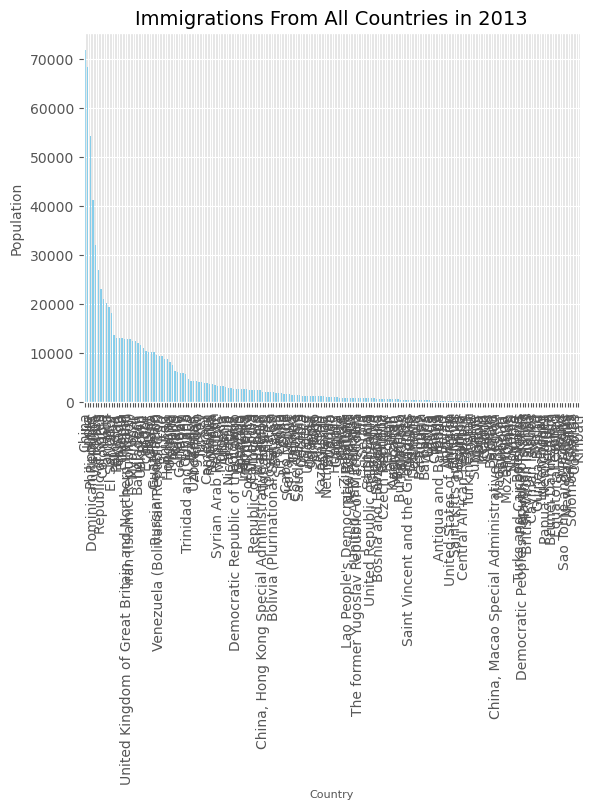

In [34]:
# now no cleanup and all countries on a nasty bar plot! Just for reference; Not pretty...
#df_2013.plot.bar(color='skyblue') # all including NaN

df_2013_noNaN.plot.bar(color='skyblue')

# update figure size
#plt.figure(figsize=(30,30))

# add labels and title
plt.title('Immigrations From All Countries in 2013', fontsize=14)
plt.xlabel('Country', fontsize=8)
plt.ylabel('Population', fontsize=10)

# tighten layout
plt.tight_layout

# show the chart
plt.show()

# Pie Charts of accumulated immigrations from all countries <a id="10"></a>

A pie chart is a circular statistical graphic, which is divided into slices to illustrate numerical proportion. In a pie chart, the arc length of each slice, is proportional to the quantity it represents. 

Reference: [Pie plot using pandas dataframe] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html

In [26]:
# add your implemenation here
# THOUGHT: use Total column and, like the bar chart, group by alphabetical category for readability

array([<Axes: ylabel='Total'>], dtype=object)

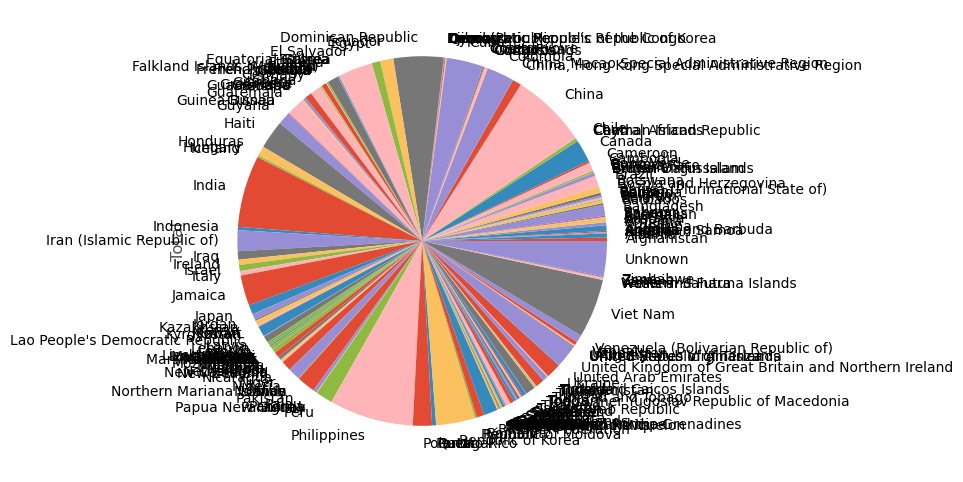

In [27]:
# get total for all countries as long as index value is NOT Total
all_countries_total = df_usa[df_usa.index != 'Total']['Total']

# create simple pie chart to get feel for how data needs to be manipulated
all_countries_total.plot.pie(subplots=True, figsize=(12,6))

In [28]:
# to get better feel for data, print NaN values, if any
# get count of nan countries
NaN_count_Total = df_usa['Total'].isna().sum()

# get list of countries with NaN values
Nan_count_countries = df_usa[df_usa['Total'].isna()].index

# print NaN info
print(f'There are {NaN_count_Total} countries with NaN values in 2013. They are: \n{Nan_count_countries}')

There are 0 countries with NaN values in 2013. They are: 
Index([], dtype='object', name='Country')


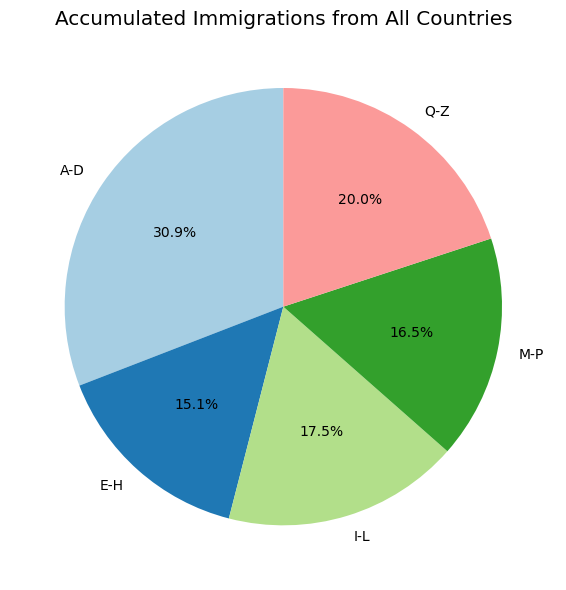

In [29]:
# No NaN values, so no need to account for this

# pie chart of accumulated immigrations by alphabetical group
plt.figure(figsize=(8,6))

# plot the pie chart
grouped_data['TotalPopulation'].plot.pie(
    autopct='%1.1f%%', # show percentages
    labels=grouped_data.index, # alphabetical groups as labels
    colors=plt.cm.Paired.colors, # fun color scheme; hehe
    startangle=90, # start from top
    textprops={'fontsize':10} # adjust font size for readability
)

# Add title and labels
plt.title("Accumulated Immigrations from All Countries")
plt.ylabel('') # remove default y-axis for better readability

# tighten layout
plt.tight_layout()

# show chart
plt.show()

In [30]:
# For reference, print the names of the countries that fall within each category
# Could reference the bar chart for this information, but wanted to pair this with the above pie chart

for bin_name, countries in grouped_data['Countries'].items():
    print(f"Countries in {bin_name}:")
    country_list = countries.split(', ')  # Split the comma-separated list of countries
    for country in country_list:
        print(f"  - {country}")
    print()  # Add a newline for better readability

Countries in A-D:
  - China
  - Dominican Republic
  - Cuba
  - Colombia
  - Canada
  - Bangladesh
  - Brazil
  - Bhutan
  - Argentina
  - Cameroon
  - Albania
  - Bulgaria
  - Democratic Republic of the Congo
  - Australia
  - Armenia
  - Cambodia
  - China
  - Hong Kong Special Administrative Region
  - Afghanistan
  - Costa Rica
  - Bolivia (Plurinational State of)
  - Belarus
  - Chile
  - Cabo Verde
  - Côte d'Ivoire
  - Algeria
  - Congo
  - Belize
  - Bosnia and Herzegovina
  - Czech Republic
  - Belgium
  - Azerbaijan
  - Bahamas
  - Burkina Faso
  - Denmark
  - Barbados
  - Austria
  - Croatia
  - Antigua and Barbuda
  - Benin
  - Burundi
  - Dominica
  - Central African Republic
  - Angola
  - Cyprus
  - Bahrain
  - Chad
  - China
  - Macao Special Administrative Region
  - Djibouti
  - Bermuda
  - Botswana
  - Democratic People's Republic of Korea
  - British Virgin Islands
  - Aruba
  - Cayman Islands
  - Anguilla
  - Brunei Darussalam
  - Comoros

Countries in E-H:
  - Hai

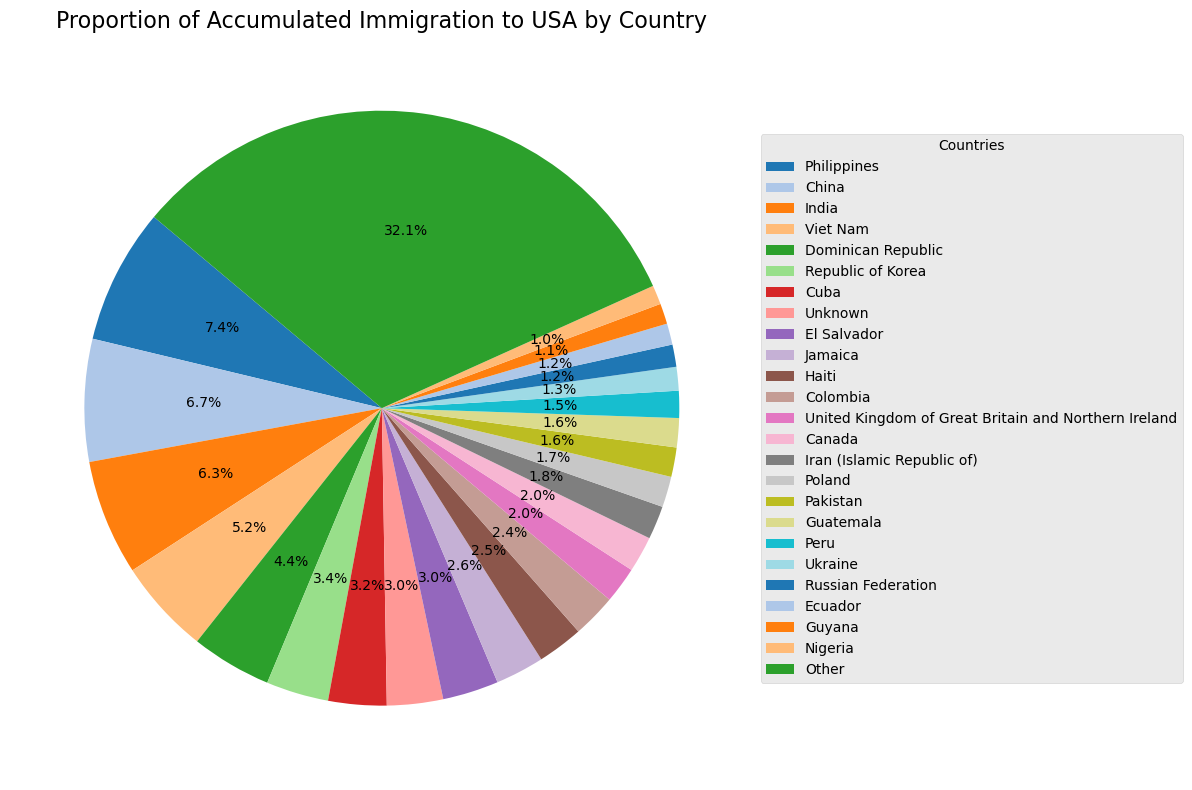

In [36]:
total_immigration = df_usa.drop(columns=['Continent', 'Region', 'DevName', 'Total']).sum(axis=1)

# Sort the data in descending order
total_immigration_sorted = total_immigration[total_immigration.index != 'Total'].sort_values(ascending=False)

# Group smaller countries into an "Other" category (optional)
threshold = total_immigration_sorted.sum() * 0.01  # 1% threshold
main_countries = total_immigration_sorted[total_immigration_sorted >= threshold]
other_countries = pd.Series({'Other': total_immigration_sorted[total_immigration_sorted < threshold].sum()})

# Combine the main countries and "Other" category
combined_data = pd.concat([main_countries, other_countries])

# Create the pie chart
plt.figure(figsize=(12, 8))
plt.pie(
    combined_data,  # Values for each slice
    labels=None,  # No labels on the chart (use legend instead)
    autopct='%1.1f%%',  # Display percentages on the chart
    startangle=140,  # Rotate the chart for better readability
    colors=plt.cm.tab20.colors  # Use a color map for distinct colors
)

# Add a legend
plt.legend(combined_data.index, title="Countries", loc="center left", bbox_to_anchor=(1, 0.5))

# Add a title
plt.title('Proportion of Accumulated Immigration to USA by Country', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()